### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
library(ggplot2)
library(plyr)

In [4]:
#Exploring the data format of 3 cities
head(ny)
head(wash)
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Which is the most common month of travel in Chicago??**

In [7]:
#Summary Table

#Checking the frequency of each month
count(chi$start_month)

#Creating a mode function for the starting months.
mode_month <- function(m){
  uniqm <- unique(m)
  uniqm[which.max(tabulate(match(m, uniqm)))]
}

#Calculating which month appeared the most.
mode_month(chi$start_month)

x,freq
April,1526
February,930
January,650
June,2816
March,803
May,1905


[1] "June"

[1] "2017-06-23" "2017-05-25" "2017-01-04" "2017-03-06" "2017-01-17"
[6] "2017-06-26"

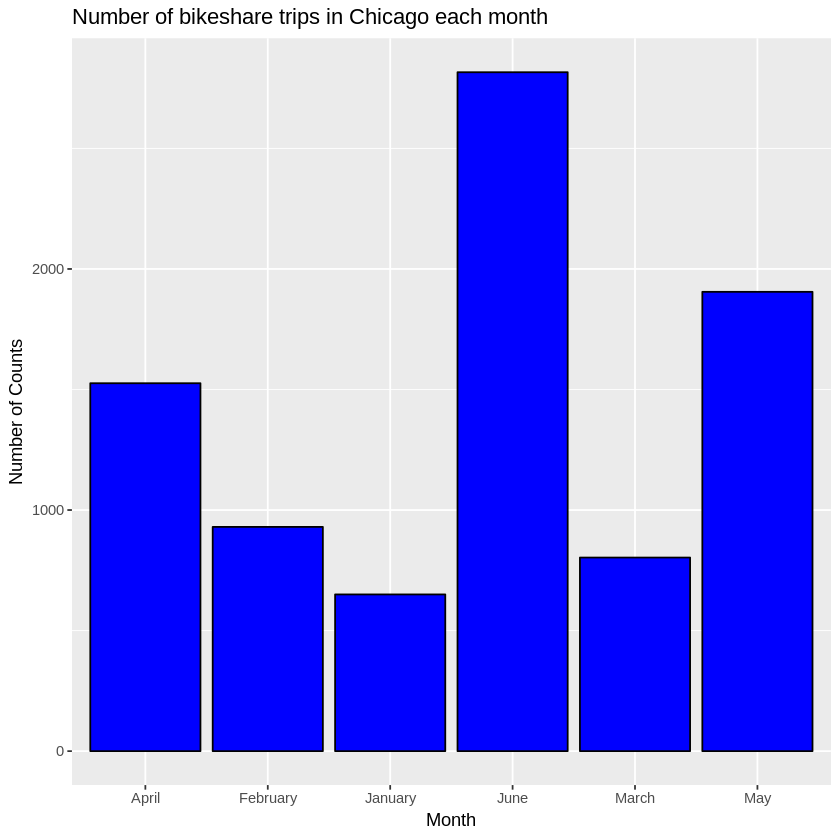

In [25]:
#Visualization

#Converting start.time to be date format
Date <- as.Date(chi$Start.Time)
head(Date)

#Adding a column for chi for the start date
chi$start_date <- Date

#Adding a column for chi for the month only of the start date
chi$start_month <- months(chi$start_date)


#Creating a bar chart for the start month
ggplot(data = chi, aes(x = start_month)) +
  geom_bar(fill = 'red', color = 'black') +
  ggtitle("Number of bikeshare trips in Chicago each month") +
  labs(x = "Month", y = "Number of Counts")

**Insight: June is the most common month with 2816 counts followed by May and April in Chicago. January has the least number of trips. It seems that number of trips keeps increasing as the months go by.**

### Question 2

**What is the average travel time for users in Washington city based on their user type?**

In [16]:
#Summary Table

#Creating filter for user types
cust_filter <- wash$User.Type == "Customer"
sub_filter <- wash$User.Type == "Subscriber"

#Creating data frame for the Washington data for user types
wash_cust <- wash[cust_filter,]
wash_sub <- wash[sub_filter,]


#Creating Function to Calculate mean of the trip duration
avg_trip <- function(x){
  sum(x) / length(x)
}

#Finding average trip duration
avg_trip(wash_cust$Trip.Duration)
avg_trip(wash_sub$Trip.Duration)

#Creating mean for trip duration
avg_cust <- mean(wash_cust$Trip.Duration)
avg_sub <- mean(wash_sub$Trip.Duration)

#Creating table with two average values
avg_user <- rbind(avg_cust, avg_sub)

#Naming user type in table
user_type <- rbind("Customer", "Subscriber")

#Creating data frame
avg_trip_user <- data.frame(avg_user, user_type)
avg_trip_user



[1] 2634.429

[1] 733.326

,avg_user,user_type
avg_cust,2634.429,Customer
avg_sub,733.326,Subscriber


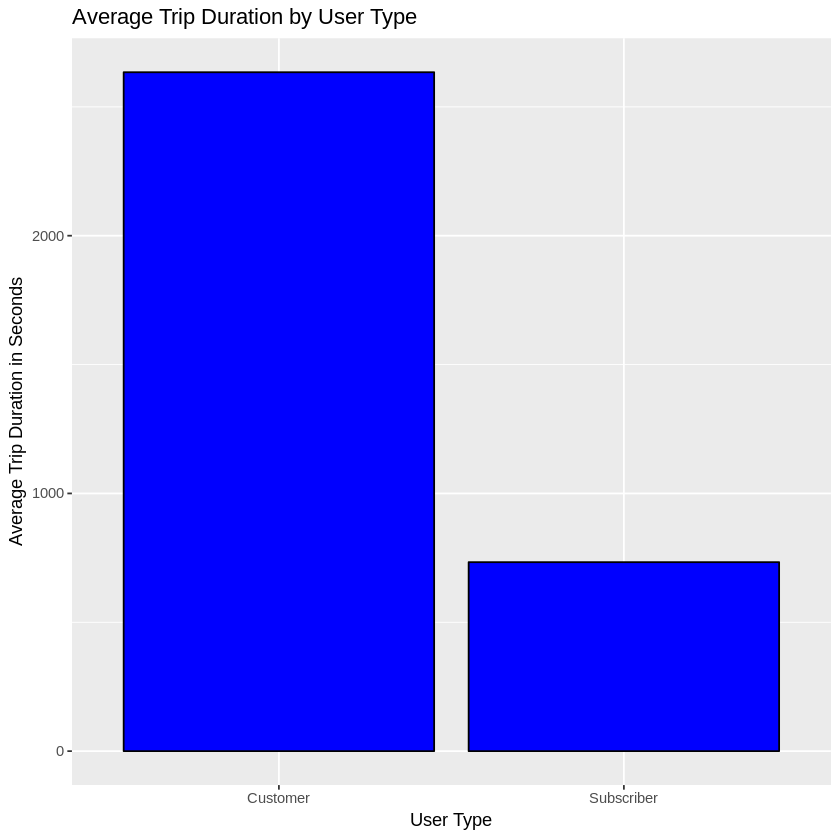

In [17]:
#Visualization

#Creating a bar graph for Washington trip duration by user type.

ggplot(data = avg_trip_user, aes(x = user_type, y = avg_user)) +
  geom_col(fill = 'blue', color = 'black') +
  ggtitle("Average Trip Duration by User Type") +
  labs(x = "User Type", y = "Average Trip Duration in Seconds")

**Insight: In Washington City, the average trip duration of non subscriber customers is 2634.43 seconds. The average trip duration of Subscribers is 733.33 seconds. This shows that subscribers take shorter trips than customers on an average in Washington city.**

### Question 3

**What are the counts of each user type (Subscriber/Customer)?**

In [36]:
#Summary Table

#Using Table function to get counts of customers and subscribers in each city

table(ny$User.Type)
table(wash$User.Type)
table(chi$User.Type)


             Customer Subscriber 
       119       5558      49093 


             Customer Subscriber 
         1      23450      65600 


             Customer Subscriber 
         1       1746       6883 

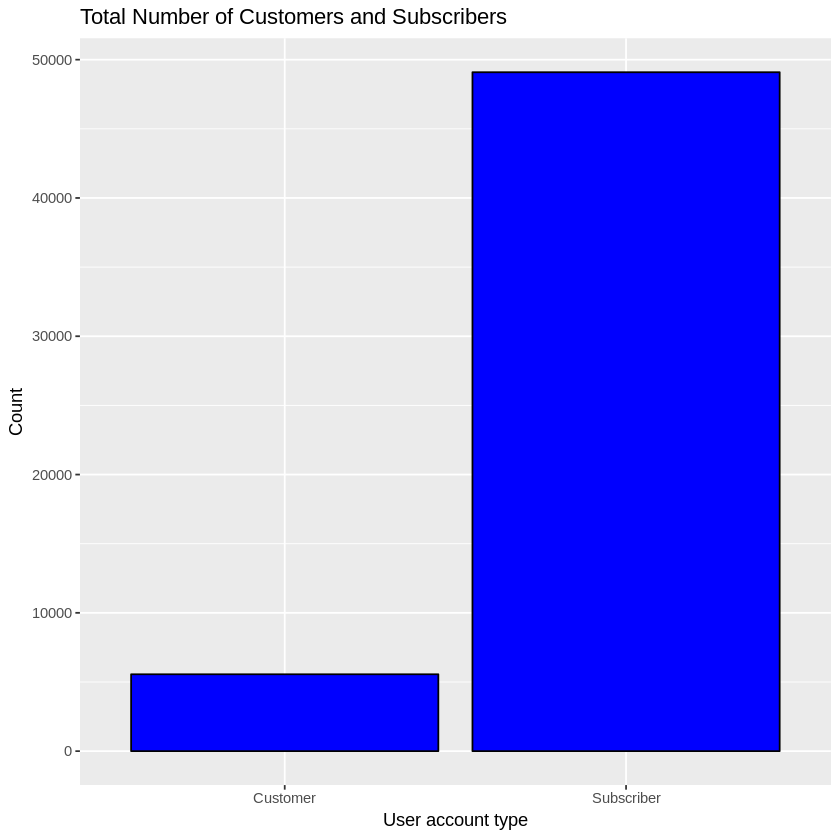

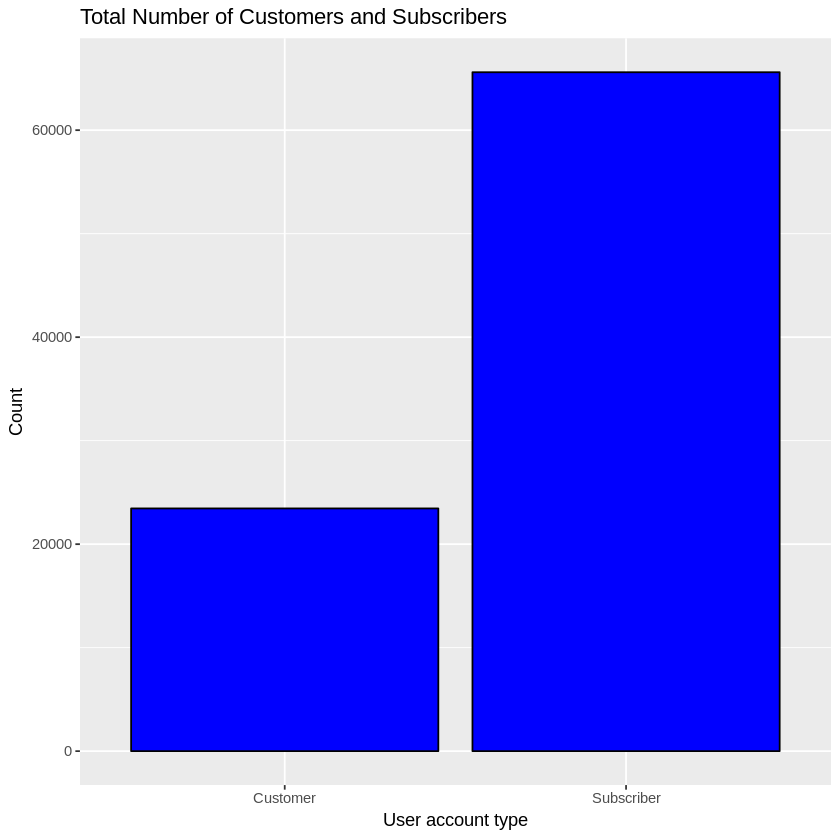

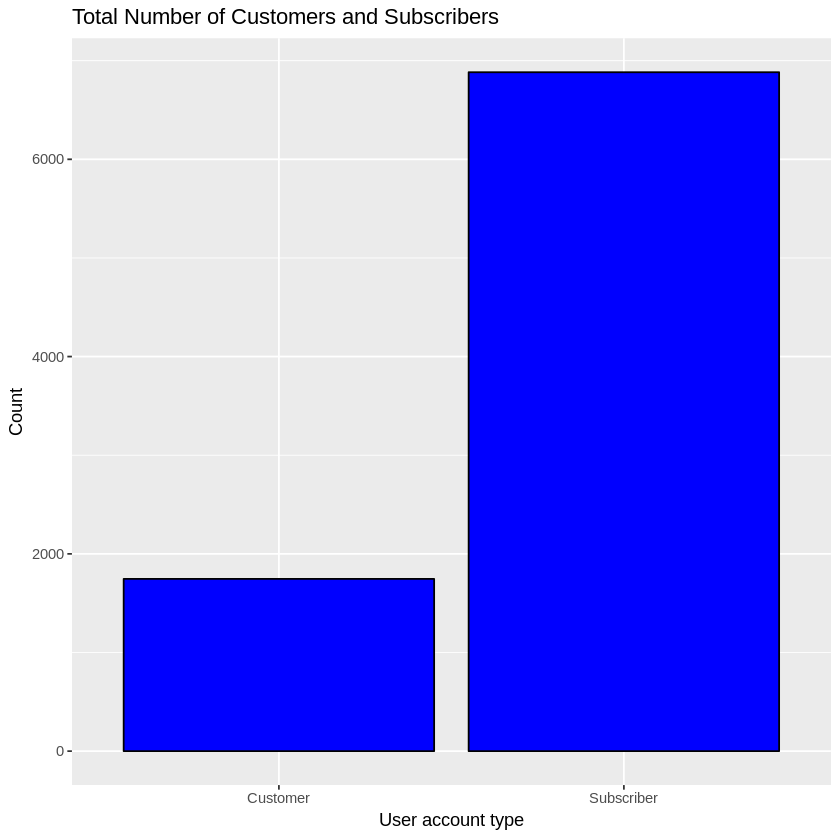

In [24]:
#Visualization

library(ggplot2)
library(plyr)

user.Count <- function(d)
{
  ggplot(aes(x=User.Type), data=subset(d, User.Type != ""))+
    geom_bar(fill = 'red', color = 'black', stat = "count") +
    labs(x = "User account type", y="Count")+
    ggtitle("Total Number of Customers and Subscribers")
}
user.Count(ny)
user.Count(wash)
user.Count(chi)

**Insight: In all the three cities, the count of Subscribers is way more than the count of customers. The reason for this may be it is cheaper with subscription than without subscription**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')